In [1]:
import zarr
import os
import numpy as np
import pickle

In [2]:
# Load segmentation_counts from pickle file
with open('pixel_counts.pkl', 'rb') as f:
  layer_counts = pickle.load(f)

layer_counts

{0: 87188153803,
 78: 5810,
 144: 18896,
 479: 7513,
 494: 1306,
 506: 4355,
 832: 3588,
 1693: 1954,
 2082: 7966,
 2394: 3184,
 2788: 1550,
 3472: 12845,
 3593: 1802,
 3657: 14373,
 3659: 8442,
 4245: 3702,
 4573: 5192,
 5179: 11906,
 5642: 2848,
 5749: 8727,
 5804: 925,
 7133: 5580,
 7839: 2109,
 8040: 3086,
 8059: 3522,
 8760: 15442,
 8777: 1402,
 8948: 8661,
 9355: 6793,
 9357: 50069,
 10015: 1317,
 12476: 2462,
 12598: 1233,
 14123: 8562,
 15129: 245353,
 15210: 4920,
 15476: 3862,
 15724: 9626,
 16031: 1950,
 16427: 5294,
 17161: 7886,
 17202: 10271,
 17227: 3805,
 17717: 16592,
 17970: 1168,
 18076: 3733,
 18912: 3490,
 18962: 5865,
 18970: 6887,
 19671: 1652,
 19835: 2455,
 20221: 6209,
 20282: 9206,
 20568: 915,
 21588: 6822,
 21592: 2965,
 23070: 24728,
 23612: 4654,
 23748: 7449,
 24669: 4016,
 24985: 5941,
 25006: 8173,
 25470: 32866,
 25586: 8053,
 25720: 9230,
 26407: 12945,
 26497: 6024,
 26972: 9615,
 27008: 11837,
 28984: 6958,
 29020: 1787,
 29127: 10841,
 29163: 3950

In [3]:
import pandas as pd

df = pd.DataFrame(list(layer_counts.items()), columns=['Object_ID', 'Pixel_Count'])

df.head()

,Object_ID,Pixel_Count
0,0,87188153803
1,78,5810
2,144,18896
3,479,7513
4,494,1306


In [4]:
mean_count = df['Pixel_Count'].mean()
std_dev = df['Pixel_Count'].std()

print(f"Mean: {mean_count}")
print(f"Standard Deviation: {std_dev}")


Mean: 249994.2005598991
Standard Deviation: 132294887.73560713


In [5]:
import numpy as np
import matplotlib.pyplot as plt

df_filtered = df[df['Object_ID'] != 0]

df_filtered.head()


,Object_ID,Pixel_Count
1,78,5810
2,144,18896
3,479,7513
4,494,1306
5,506,4355


In [6]:
df_filtered.set_index('Object_ID')

,Pixel_Count
Object_ID,
78,5810
144,18896
479,7513
494,1306
506,4355
...,...
469362,1742
474801,2600
478590,2250


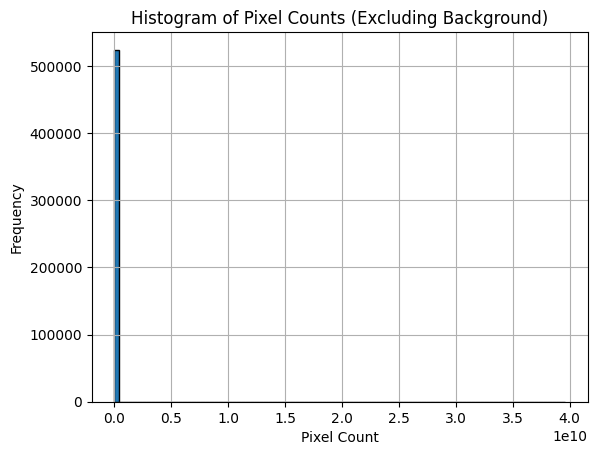

In [11]:
# Now plot the histogram for the filtered DataFrame
df_filtered['Pixel_Count'].hist(bins=100, edgecolor='black')
plt.title('Histogram of Pixel Counts (Excluding Background)')
plt.xlabel('Pixel Count')
plt.ylabel('Frequency')
plt.show()

In [8]:
df_filtered['Pixel_Count'].describe()


count    5.240220e+05
mean     8.361206e+04
std      5.473029e+07
min      6.000000e+00
25%      1.831000e+03
50%      3.280000e+03
75%      6.617000e+03
max      3.961891e+10
Name: Pixel_Count, dtype: float64

In [9]:
df['Pixel_Count'].describe()

count    5.240230e+05
mean     2.499942e+05
std      1.322949e+08
min      6.000000e+00
25%      1.831000e+03
50%      3.280000e+03
75%      6.617000e+03
max      8.718815e+10
Name: Pixel_Count, dtype: float64

In [10]:
df_filtered.sort_values(by='Pixel_Count', ascending=False)

,Object_ID,Pixel_Count
615,324152,39618911682
243361,489879,13955133
246640,191146,4228032
225661,30210,2885458
226574,142618,2579079
...,...,...
488730,71172,8
224592,281428,8
287678,473368,8
291520,136072,7


In [17]:
percentiles = df_filtered['Pixel_Count'].quantile([0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 0.75, 0.98, 0.99])
print(percentiles)

0.01      534.00
0.02      662.00
0.05      881.00
0.10     1144.00
0.25     1831.00
0.50     3280.00
0.75     6617.00
0.98    51309.74
0.99    80797.74
Name: Pixel_Count, dtype: float64


In [18]:
5 * 30 * 30

4500

In [28]:
df_filtered[df_filtered['Pixel_Count'] < 1000].shape

(37294, 2)

In [20]:
1280*10_000*10_000 / (100*1000*1000)

1280.0

In [25]:
384*1280

491520

In [29]:
df_filtered.shape

(524022, 2)

In [33]:
df_filtered.dtypes

Object_ID      uint64
Pixel_Count     int64
dtype: object